<a href="https://colab.research.google.com/github/mostafa11244/MLproject/blob/main/startup_expansion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
data =pd.read_excel('/content/startup-expansion.xlsx')
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [9]:
data.describe().round(2)

,Store ID,Marketing Spend,Revenue
count,150.00,150.00,150.00
mean,75.50,2893.15,39301.43
std,43.45,367.86,15465.75
min,1.00,1811.00,15562.00
25%,38.25,2662.25,21113.50
50%,75.50,2898.00,42993.00
75%,112.75,3111.50,51145.50
max,150.00,3984.00,68828.00


In [13]:
 data['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [14]:
 data['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [15]:
 data['Sales Region'].value_counts() 

Region 2    86
Region 1    64
Name: Sales Region, dtype: int64

In [16]:
data.isna().sum()

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [18]:
data.duplicated().sum()

0


**Exploring Analysing data**


In [20]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603
146,147,Brownsville,Texas,Region 2,New,3675,63148
147,148,Rockford,Illinois,Region 1,New,2648,43377
148,149,College Station,Texas,Region 2,New,2994,22457


<Axes: >

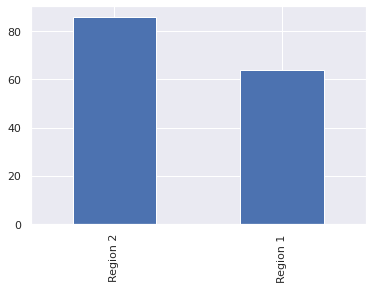

In [23]:
data['Sales Region'].value_counts().plot.bar()

<Axes: xlabel='State'>

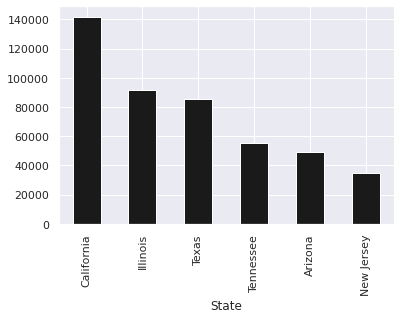

In [40]:
data[data['New Expansion'] == 'New'].groupby('State').sum()['Revenue'].nlargest(10).plot.bar(color='k')

<Axes: xlabel='State'>

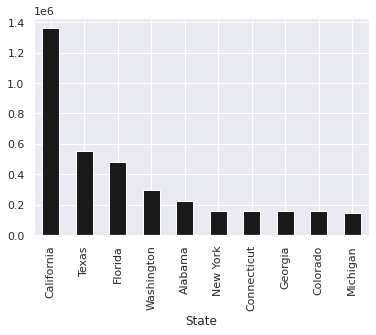

In [38]:
data[data['New Expansion'] == 'Old'].groupby('State').sum()['Revenue'].nlargest(10).plot.bar(color='k')

In [41]:
data['Profit'] = data['Revenue'] - data['Marketing Spend']

In [42]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018
...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729
148,149,College Station,Texas,Region 2,New,2994,22457,19463


In [48]:
 data['ROMS'] = round(data['Profit'] / data['Marketing Spend']*100)
 data['ROMS%'] =  data['ROMS'] / 100

In [49]:
data

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,Profit,ROMS,ROMS%
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009,1769.0,17.69
1,2,Midland,Texas,Region 2,Old,2727,45689,42962,1575.0,15.75
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786,1690.0,16.90
3,4,Denton,Texas,Region 2,Old,2759,38284,35525,1288.0,12.88
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018,1987.0,19.87
...,...,...,...,...,...,...,...,...,...,...
145,146,Paterson,New Jersey,Region 1,New,2251,34603,32352,1437.0,14.37
146,147,Brownsville,Texas,Region 2,New,3675,63148,59473,1618.0,16.18
147,148,Rockford,Illinois,Region 1,New,2648,43377,40729,1538.0,15.38
148,149,College Station,Texas,Region 2,New,2994,22457,19463,650.0,6.50


In [50]:
data.to_csv('startup-expansion-cleaned.csv')